In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
def poisson_proba(k, lambda_):
    
    return (lambda_ ** k) * (np.exp(-lambda_)) / np.math.factorial(k)

**Задача 1**

О непрерывной равномерно распределенной случайной величине $B$ известно, что ее дисперсия равна 0.2. Можно ли найти правую границу величины $B$ и ее среднее значение зная, что левая граница равна 0.5? Если да, найдите ее.

Дисперсия равномерного распределения равна:
    $$D(X) = \frac{(b - a)^2}{12}$$

из формулы можем найти правую гриницу:
    $$\frac{(b - \frac{1}{2})^2}{12}=\frac{1}{5}$$
    \
    $$\frac{(b - \frac{1}{2})^2}{12}-\frac{1}{5}=0$$
    \
    $$\frac{b^2 - b + \frac{1}{4}}{12}-\frac{1}{5}=0$$
    \
    $$\frac{b^2}{12} - \frac{b}{12} + \frac{1}{48} -\frac{1}{5}=0$$
    \
    $$\frac{b^2}{12} - \frac{b}{12} -\frac{23}{240}=0$$
    \
    Приведем к общему знаменателю и получим уравнение:
    \
    $$20b^2 - 20b - 43=0$$

Найдем дискриминант:
$$D=b2-4ac=400+3440=3840$$

$$X_{1,2}=\frac{-b \pm \sqrt{D}}{2a}=\frac{20 \pm \sqrt{3840}}{40}=\frac{20 \pm 16\sqrt{15}}{40}$$

$$X_1=\frac{5+4\sqrt{15}}{10}\approx 2.0492$$

$$X_2=\frac{5-4\sqrt{15}}{10}\approx -1.0492$$

Т.к. у нас два корня, один из которых меньше левой границы, таким образом можно сделать вывод, что правой границей является значение $$\approx 2.0492$$

Найдем математическое ожидание и построим график:
    $$M(X)=\frac{b+a}{2}=\frac{2.0492+0.5}{2}=\frac{2.5492}{2}\approx 1.2746$$

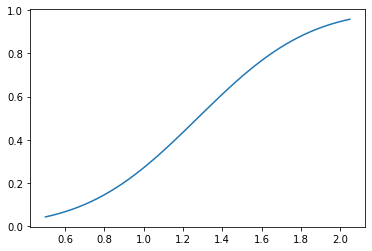

In [3]:
loc = 1.2746 # mu
scale = 0.2**0.5 #sigma
ox = np.linspace(0.5, 2.0492, 1000)
oy = stats.norm.cdf(ox, loc, scale)
plt.plot(ox, oy)

**Задача 2**

Рост взрослого населения города X имеет нормальное распределение, причем, средний рост равен 174 см, а среднее квадратическое отклонение равно 8 см. посчитайте, какова вероятность того, что случайным образом выбранный взрослый человек имеет рост:
1. больше 182 см?
2. больше 190 см?
3. от 166 см до 190 см?
4. от 166 см до 182 см?
5. от 158 см до 190 см?
6. не выше 150 см или не ниже 190 см?
7. не выше 150 см или не ниже 198 см?
8. ниже 166 см?

Задачу можно решить двумя способами: без использования сторонних библиотек (numpy, scipy, pandas и пр.), а затем проверить себя с помощью встроенных функций

In [4]:
loc = 174 # ню
scale = 8 # сигма

In [5]:
samples=np.random.normal(loc, scale,size=10000)

In [6]:
samples.min()

139.24940295186647

In [7]:
samples.max()

205.5410489955364

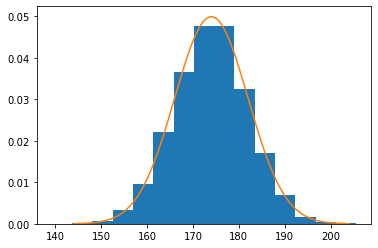

In [8]:
ox = np.linspace(144, 204,1000)
oy = np.array([stats.norm.pdf(x, loc, scale) for x in ox])
plt.hist(samples, density=True, bins=15)
plt.plot(ox,oy)

In [9]:
samples.mean()

173.86675416683522

In [10]:
samples.var()

64.76182224431278

**1)** какова вероятность того, что случайным образом выбранный взрослый человек имеет рост больше 182 см?

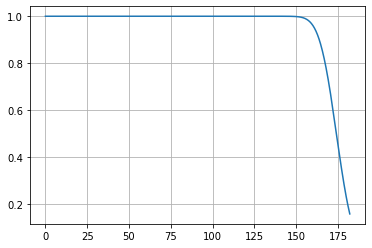

In [11]:
ox = np.linspace(182, 0, 1000)
oy = 1 - stats.norm.cdf(ox, loc, scale)
# plt.hist(samples, density=True, bins=15)
plt.grid()
plt.plot(ox,oy)

Вероятность того, что случайным образом выбранный взрослый человек имеет рост больше 182 см равна **0,1**

по правилу трех сигм, вероятность будет равна 15,8% или 0,158, т.к. 174 + 8 = 182, значит в первую сигму не попадаем, а сумма вероятностей второй и третьей сигмы равно 13,6% + 2,1% + 0,1% = 15,8%

**2)** какова вероятность того, что случайным образом выбранный взрослый человек имеет рост:
больше 190 см?

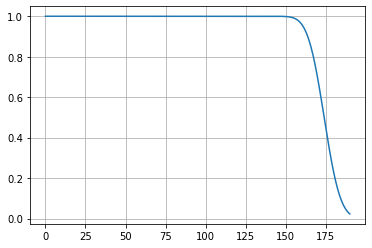

In [12]:
ox = np.linspace(0, 190,1000)
oy = 1 - stats.norm.cdf(ox, loc, scale)
plt.grid()
plt.plot(ox,oy)

Вероятность того, что случайным образом выбранный взрослый человек имеет рост больше 182 см примерно равна **0,05**

по правилу трех сигм, вероятность будет равна 2,2% или 0,022, т.к. 174 + 2 * 8 = 190, значит в первую и вторую сигму не попадаем, а сумма вероятностей третьей сигмы равно 2,1% + 0,1% = 2,2%

**3)** какова вероятность того, что случайным образом выбранный взрослый человек имеет рост: от 166 см до 190 см?

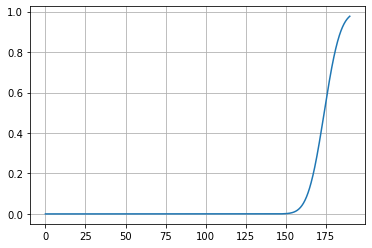

In [13]:
ox1 = np.linspace(0, 190,1000)
ox2 = np.linspace(0, 166,1000)
oy1 = stats.norm.cdf(ox1, loc, scale)
oy2 = stats.norm.cdf(ox2, loc, scale)
plt.grid()
plt.plot(ox1,oy1)

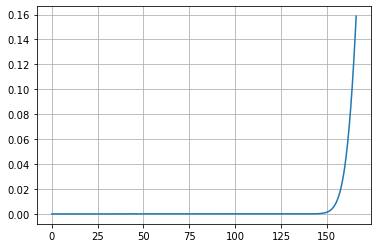

In [14]:
plt.grid()
plt.plot(ox2,oy2)

190: 0,98 \
166: 0,16

In [15]:
0.98-0.16

0.82

по правилу трех сигм, вероятность будет  в пределах $$\mu - \sigma$$ и $$\mu + 2\sigma$$ 
таким образом 34,1% + 34,1% + 13,6% = 81,8% или **0,818**

**4)** какова вероятность того, что случайным образом выбранный взрослый человек имеет рост: от 166 см до 182 см?

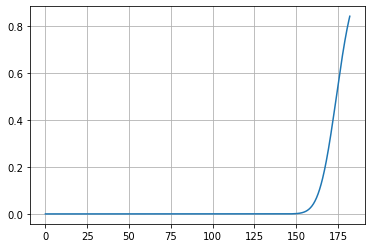

In [16]:
ox1 = np.linspace(0, 182,1000)
oy1 = stats.norm.cdf(ox1, loc, scale)
plt.grid()
plt.plot(ox1,oy1)

вероятность примерно равна 0,84

вероятность от 166 см нам уже известна, она равна 0,16

In [17]:
0.84-0.16

0.6799999999999999

по правилу трех сигм, вероятность будет  в пределах $$\mu - \sigma$$ и $$\mu + \sigma$$ 
таким образом 34,1% + 34,1% = 68,2% или **0,682**

**5)** какова вероятность того, что случайным образом выбранный взрослый человек имеет рост: от 158 см до 190 см?

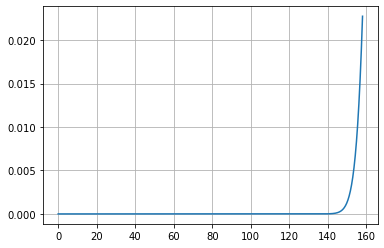

In [18]:
ox1 = np.linspace(0, 158,1000)
ox2 = np.linspace(0, 190,1000)
oy1 = stats.norm.cdf(ox1, loc, scale)
oy2 = stats.norm.cdf(ox2, loc, scale)
plt.grid()
plt.plot(ox1,oy1)

Вероятность от 158см примерно 0,024

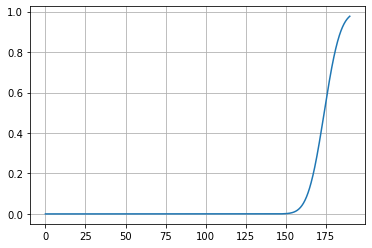

In [19]:
plt.grid()
plt.plot(ox2,oy2)

вероятность до 190 см примерно 0,95

In [20]:
0.93+0.024

0.9540000000000001

по правилу трех сигм, вероятность будет  в пределах $$\mu - 2\sigma$$ и $$\mu + 3\sigma$$ 
таким образом 13,6% + 34,1% + 34,1% + 13,6% = 95,4% или **0,954**

**6)** какова вероятность того, что случайным образом выбранный взрослый человек имеет рост: не выше 150 см или не ниже 190 см?

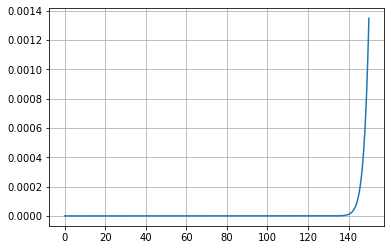

In [21]:
ox1 = np.linspace(0, 150,1000)
oy1 = stats.norm.cdf(ox1, loc, scale)
plt.grid()
plt.plot(ox1,oy1)

вероятность примерно 0,0013

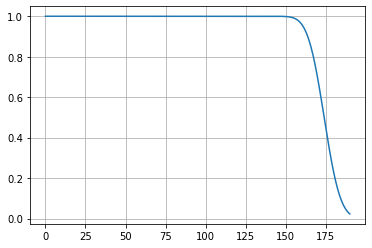

In [22]:
ox2 = np.linspace(0, 190,1000)
oy2 = 1 - stats.norm.cdf(ox2, loc, scale)
plt.grid()
plt.plot(ox2,oy2)

вероятность примерно 0,025

In [23]:
0.025+0.0013

0.0263

по правилу трех сигм, вероятность будет  в диапазоне за пределами третьей сигмы и $$\mu + 3\sigma$$ и выше \
таким образом 0,1% + 2,3% + 0,1% = 2,5% или **0,025**

**7)** какова вероятность того, что случайным образом выбранный взрослый человек имеет рост: не выше 150 см или не ниже 198 см?

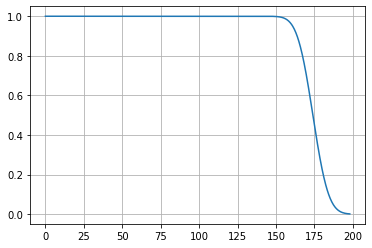

In [24]:
ox2 = np.linspace(0, 198,1000)
oy2 = 1 - stats.norm.cdf(ox2, loc, scale)
plt.grid()
plt.plot(ox2,oy2)

вероятность равна 0

In [25]:
0.0013+0

0.0013

по правилу трех сигм, вероятность будет  в диапазоне за пределами - третьей сигмы и за пределами + третьей сигмы
таким образом 0,1% + 0,1% = 0,2% или **0,002**

**8)** какова вероятность того, что случайным образом выбранный взрослый человек имеет рост: ниже 166 см?

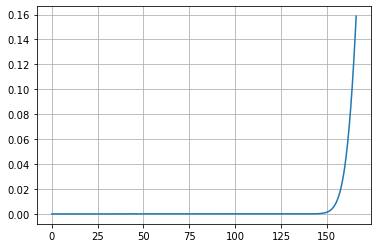

In [26]:
ox = np.linspace(0, 166,1000)
oy = stats.norm.cdf(ox, loc, scale)
plt.grid()
plt.plot(ox,oy)

такая вероятность равна 0,16

по правилу трех сигм, вероятность будет  в диапазоне $$\mu - 2\sigma$$ и ниже \
таким образом 13,6% + 2,1% + 0,1% = 15,8% или **0,158**

**Задача 3 (Дополнительно)**

Коробки с шоколадом упаковываются автоматически. Их средняя масса равна 1.06 кг. Известно, что 5% коробок имеют массу, меньшую 1 кг. Найдите: а) среднее квадратическое отклонение массы коробки, б) процент коробок, имеющих массу больше 1.1 кг.

Подсказка. 1. Можно считать, что распределение массы коробки нормальное. 2. Найдите такое значение scale, для которого значение cdf(x=1, loc=1.06, scale=scale) близко к 0.05. Точности 0.0001 будет достаточно.

среднее квадратическое отклонение массы коробки:

In [45]:
n = 0.0001 
y = 0
while y <= 0.05:
    y = stats.norm.cdf(x=1, loc=1.06, scale=n)
    print('y = ', y,  '|' , 'n = ', n)
    n+=0.0001

y =  0.0 | n =  0.0001
y =  0.0 | n =  0.0002
y =  0.0 | n =  0.00030000000000000003
y =  0.0 | n =  0.0004
y =  0.0 | n =  0.0005
y =  0.0 | n =  0.0006000000000000001
y =  0.0 | n =  0.0007000000000000001
y =  0.0 | n =  0.0008000000000000001
y =  0.0 | n =  0.0009000000000000002
y =  0.0 | n =  0.0010000000000000002
y =  0.0 | n =  0.0011000000000000003
y =  0.0 | n =  0.0012000000000000003
y =  0.0 | n =  0.0013000000000000004
y =  0.0 | n =  0.0014000000000000004
y =  0.0 | n =  0.0015000000000000005
y =  4.605353009578287e-308 | n =  0.0016000000000000005
y =  3.6143214276704007e-273 | n =  0.0017000000000000006
y =  6.352273120197637e-244 | n =  0.0018000000000000006
y =  3.592137508091813e-219 | n =  0.0019000000000000006
y =  4.906713927145114e-198 | n =  0.0020000000000000005
y =  7.610161632950828e-180 | n =  0.0021000000000000003
y =  4.468099338900495e-164 | n =  0.0022
y =  2.563249034907877e-150 | n =  0.0023
y =  3.0566967063806463e-138 | n =  0.0024
y =  1.390392118548

Параметр scale будет равен 0,0365

In [46]:
oy = stats.norm.cdf(x=1, loc=1.06, scale=0.0365)
oy

0.05010508110149495

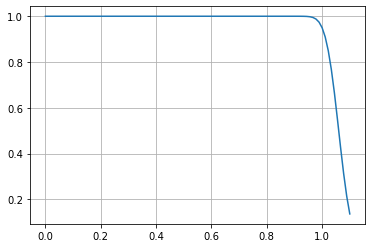

In [51]:
ox = np.linspace(0, 1.1,100)
oy = 1 - stats.norm.cdf(ox, loc=1.06, scale=0.0365)
plt.grid()
plt.plot(ox,oy)

мат.ожидание 1,06 а сигма = 0,0365. чтобы найти вероятность того, что коробка будет больше 1,1 кг по правилам трех сигм 1,1 кг попадает в диапазон двух сигм, значит 13,6% + 2,1% + 0,1% = 15,8%. На графике также видим, что значение примерно равно 0,15 или 15% \
\
**Ответ:** \
а) среднее квадратическое отклонение массы коробки 0.0365 \
б) процент коробок, имеющих массу больше 1.1 кг 15,8%